## The transient Universe
1. Tidal distruption events. [Stars shouldn't go near supermassive black holes, it's dangerous!]

Figure from Gezari (2021) ["Tidal Disruption Events", review](https://arxiv.org/abs/2104.14580)

![Screen%20Shot%202022-01-23%20at%2011.00.29.png](attachment:Screen%20Shot%202022-01-23%20at%2011.00.29.png)


2. Sudden flares of active galactic nuclei

Figure from  Graham et al (2021) ["A Candidate Electromagnetic Counterpart to the Binary Black Hole Merger Gravitational Wave Event S190521ga"](https://arxiv.org/abs/2006.14122)

![Screen%20Shot%202022-01-23%20at%2011.02.53.png](attachment:Screen%20Shot%202022-01-23%20at%2011.02.53.png)


3. Supernovae.

Figure from  Jha et al (2019) ["Observational Properties of Thermonuclear Supernovae
"](https://arxiv.org/abs/1908.02303)

![Screen%20Shot%202022-01-23%20at%2011.11.23.png](attachment:Screen%20Shot%202022-01-23%20at%2011.11.23.png)




### Tasks

**Remember this is a real research example, not an exam! You're welcome (and encouraged actually!) to use all the tutorials/answers/hack you find online!**


1) Read in `solutions/transient.npy`. This is a (100 x 3) numpy array, containing some time-series measurements from a transient phenomenon. The first column is time (arbitrary units), the second column is the flux (arbitrary units), and the third column are homoescedastic measurement uncertainties on the flux. Plot this data with the uncertainties. <span style="color:blue"> in the file : time  -- quantity -- error on quantity  </span>

2) One possible model for this data is a sharp burst with an exponential tail rising above a nominal background level. This model can be described as:

$y = b$, for $t<t_0$

$y = b + A\exp[-\alpha(t-t_0)]$, for $t\geq t_0$

where $b$ is the background amplitude, $A$ is the burst amplitude, $t_0$ is the burst epoch, and $\alpha$ encodes how rapidly the burst dies off.

Code this burst model, and code a likelihood function for this data with the burst model. *Hint: This is similar in spirit to the likelihood when fitting polynomials to data, except now $x$ is time, and the polynomial model is now the burst model.* 

3) Using one of the MCMC sampler that we looked at in class (`emcee`, `pymc`), perform a Bayesian analysis that recovers an MCMC chain of posterior probability samples for the joint parameter space of $\{b,A,t_0,\alpha\}$. You must decide on how many samples are appropriate for running your MCMC. For your priors, make them $b\in \mathrm{Uniform}[0,50]$, $A\in \mathrm{Uniform}[0,50]$, $t_0\in \mathrm{Uniform}[0,100]$, and $\ln\alpha\in \mathrm{Uniform}[-5,5]$ (careful: uniform in $\ln\alpha$, not $\alpha$).

4) Perform an appropriate check to burn-in your chain, and thin the chain by selecting only points every auto-correlation length. If you are left with a small number of samples after thinning then you may need to run your MCMC for longer in (3).

5) Make a corner plot of the $4$-D parameter space, with labels, $[68,95]\%$ credible levels and quantiles, and titles.

6) Now choose $100$ samples randomly from your burned, thinned chain and plot the $100$ corresponding burst time-series on a figure along with the original data. You may want to choose a transparency for these $100$ burst curves that allows you to see everything nicely. These are showing the posterior spread of model solutions that are consistent with the data.

7) For each parameter, find the median and 90% credible region of the marginalized distribution and quote results as, for instance, $t_0=X^{+Y}_{-Z}$ 



In [2]:
#import sys
#!{sys.executable} -m pip install corner
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook
import scipy
from scipy import optimize
import scipy.stats as stats
import emcee
import corner

In [3]:
data = np.load("../solutions/transient.npy", "r")
#print(file[:, 0])
#plt.plot(file[:, 0], file[:, 1])
x = data[:, 0]
y = data[:, 1]
sigma_y = data[:,2]

Text(0, 0.5, 'flux')

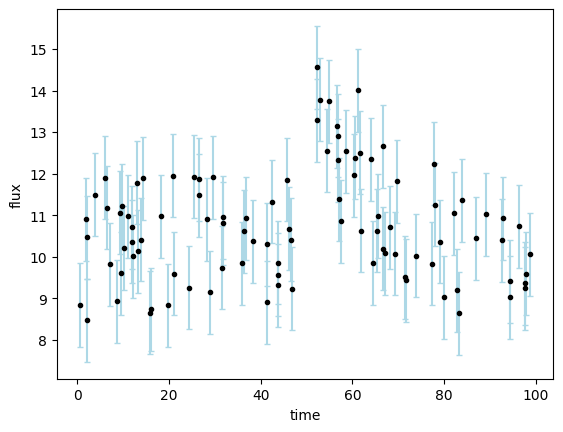

In [4]:
plt.errorbar(x, y, yerr = sigma_y , xerr=None, ecolor='lightblue', fmt= 'o', color = 'black',markersize =3 ,capsize = 2, capthick = 1)
plt.xlabel('time')
plt.ylabel('flux')


One possible model for this data is a sharp burst with an exponential tail rising above a nominal background level. This model can be described as:

$y = b$, for $t<t_0$

$y = b + A\exp[-\alpha(t-t_0)]$, for $t\geq t_0$

where $b$ is the background amplitude, $A$ is the burst amplitude, $t_0$ is the burst epoch, and $\alpha$ encodes how rapidly the burst dies off.


### Looking at the data: I dirst did a fit to have an idea of the parameters  par = [t0,  b,  A , alpha]


In [5]:
def model_ (t, par):
    modello = []
    for time in t:
        if (time < par[0]):
            modello.append(par[1])              
        else:
            modello.append(par[1] + par[2] * np.exp(- par[3] * (time-par[0])))
    
    return modello

In [6]:
#gaussian log likelihood ()
def logL(par, data, model=model_):
    x = data [:,0]
    y = data [:,1]
    sigma_y = data [:,2]

    y_fit = model(x, par)
    return sum(stats.norm.logpdf(*args) for args in zip(y, y_fit, sigma_y))

# parameters which minimize -logL
def best_par(model=model_, data=data):
    par_0 = [48, 10, 4, 1/20]
    
    neg_logL = lambda par : -logL(par, data, model)
    return scipy.optimize.fmin_bfgs(neg_logL, par_0, disp=False)

[47.87171889 10.28787785  6.34817816  0.11890542]


Text(0, 0.5, 'flux')

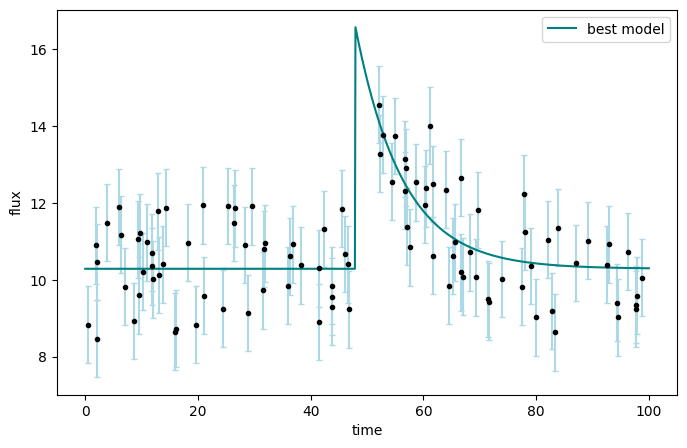

In [7]:
Ndata = x.size

par = best_par(model_, data=data)
print(par)

xgrid = np.linspace(0, 100, 1000)
yfit = model_(xgrid, par)

fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='lightblue', markersize=3, capsize=2, capthick=1)
ax.plot(xgrid, yfit, label='best model', color='teal')
ax.legend(loc='best', fontsize=10)
ax.set_xlabel('time')
ax.set_ylabel('flux')

In [8]:
np.random.seed(21)
Ndata = x.size

### let's define the prior, uniform pdf 

#### first just to visualize it

[[], [], [], []]


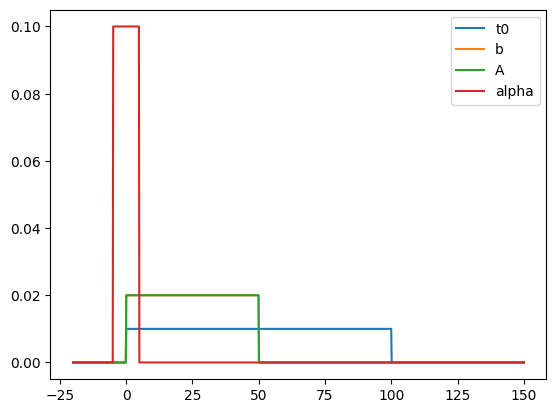

In [9]:
# par = [t0, b, A , alpha]


x_linspace = np.linspace(-20,150, 1000)
par0_mcmc = [[],[],[],[]]
print(par0_mcmc)
def Prior_plot(x):
    for xi in x:
        
        par0_mcmc[0].append(stats.uniform.pdf(xi, loc=0, scale=100))
        par0_mcmc[1].append(stats.uniform.pdf(xi, loc=0, scale=50))
        par0_mcmc[2].append(stats.uniform.pdf(xi, loc=0, scale=50))
        ln_alpha = stats.uniform.pdf(xi, loc=-5, scale=10)
        par0_mcmc[3].append((np.exp(ln_alpha)))
    return par0_mcmc

par0_mcmc = Prior_plot(x_linspace)
    
#plot
plt.plot(x_linspace, par0_mcmc[0], label = 't0' )
plt.plot(x_linspace, par0_mcmc[1], label = 'b' )
plt.plot(x_linspace, par0_mcmc[2], label = 'A' )
plt.plot(x_linspace, np.log(par0_mcmc[3]), label = 'alpha')
plt.legend()
plt.show()

    

#### real prior definition

In [10]:
def Prior(par_mcmc):
    prior_0 = stats.uniform(0,100).pdf(par_mcmc[0])
    prior_1 = stats.uniform(0,50).pdf(par_mcmc[1])
    prior_2 = stats.uniform(0,50).pdf(par_mcmc[2])
    prior_3 = stats.uniform(-5,5).pdf(np.log(par_mcmc[3]))
    
                                      
    return prior_0 * prior_1 * prior_2* prior_3


#### we have already defined the likelihood, let's get the posterior
(actually the log)

In [11]:
def logPosterior (par_mcmc, data, model = model_):
    logPrior = np.log(Prior(par_mcmc))
    if not np.isfinite(logPrior):
        return -np.inf
    return logL(par_mcmc, data, model) + logPrior

### MCMC

In [31]:
ndim = 4  # number of parameters in the model
nwalkers = 10 
nsteps = 5000 
print( "data dimensions: ", np.shape(data))

np.random.seed(0) # this makes sure that i get the same result every time i run the code
starting_guesses = np.array(par)+ 1e-4* np.random.random((nwalkers, ndim))

sampler = emcee.EnsembleSampler(nwalkers, ndim, logPosterior, args=(data, ))

sampler.run_mcmc(starting_guesses, nsteps, progress = True)
print("done")

data dimensions:  (100, 3)


  3%|▎         | 131/5000 [00:28<18:10,  4.46it/s]/tmp/ipykernel_460065/3932712940.py:2: RuntimeWarning: divide by zero encountered in log
  logPrior = np.log(Prior(par_mcmc))
  8%|▊         | 375/5000 [01:16<10:47,  7.14it/s]/tmp/ipykernel_460065/309442965.py:5: RuntimeWarning: invalid value encountered in log
  prior_3 = stats.uniform(-5,5).pdf(np.log(par_mcmc[3]))
100%|██████████| 5000/5000 [16:15<00:00,  5.13it/s]

done


In [32]:
solutions_emcee = open("sol_emcee.txt", "a")

solutions_emcee.write("5000: " + str(sampler) + str(sampler.chain) + "\n")

solutions_emcee.close()

In [33]:
import pickle

try:
    with open("sol_emcee.txt", "r") as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("5000: "):
                sampler_str = line.replace("5000: ", "").strip()
                try:
                    sampler = pickle.loads(bytes.fromhex(sampler_str))
                    break
                except (pickle.UnpicklingError, ValueError) as e:
                    print(f"Error unpickling data: {e}")
                    break
        else:
            print("Sampler not found in the file.")
except FileNotFoundError:
    print("File not found.")


print(sampler.chain.shape)

Error unpickling data: non-hexadecimal number found in fromhex() arg at position 0
(10, 5000, 4)


/tmp/ipykernel_460065/198024685.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(samples[:, :, i], "k", alpha=0.5, color = "lightseagreen")


(10, 5000, 4)


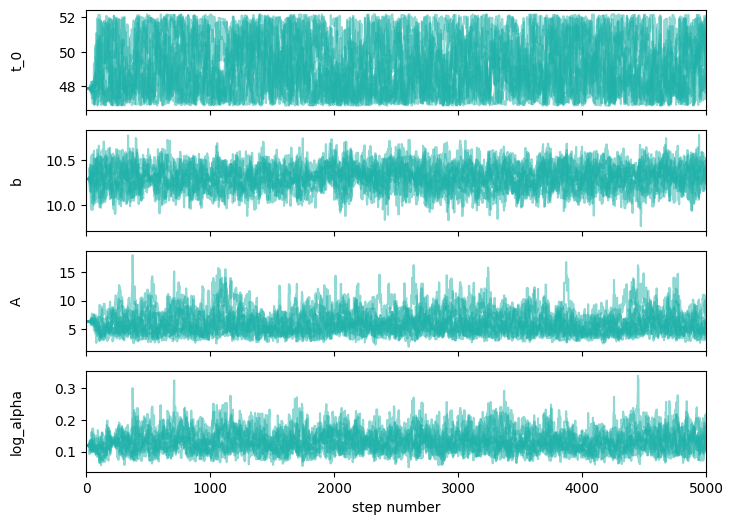

In [34]:
print(sampler.chain.shape) #original chain structure : (nwalkers, nsteps, ndim)

fig, axes = plt.subplots(4, figsize=(8, 6), sharex=True)
samples = sampler.get_chain()
labels = ["t_0", "b","A","log_alpha"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.5, color = "lightseagreen")
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

### adding a burn-in period  

(I SHOULD FIRST LOOK AT AUTOCORR LENGTH AND THROW AWAY A COUPLE OF TIMES THAT NUMBER)

In [35]:
burn = 200  # "burn-in" period to let chains stabilize
# throw-out the burn-in points and reshape:
emcee_trace  = sampler.chain[:, burn:, :].reshape(-1, ndim)
print("burned and flattened chain ",emcee_trace.shape) #burned and flattened chain WHERE IS THINNING ? I NEED TO TAKE THE AUTOCORRELATION LENGHT INOTO ACCOUNT
emcee_trace.flatten()
len(emcee_trace.flatten())



burned and flattened chain  (48000, 4)


192000

#### thinning ---> take autocorrelation length into account 

In [36]:
print(sampler.chain.shape) 
print(sampler.acceptance_fraction)
tau = sampler.get_autocorr_time()
print('autocorrelation time ( how many steps to forget where it started):', tau, "Burn-in will be a few times ", tau[0])
thin = int(np.mean(tau)/2) # thin by  half the autocorrelation time
burn = thin*10

# flatten the thinned chain, to get a flat list of samples
emcee_trace = sampler.get_chain(discard=burn, thin=thin, flat=True).flatten()
print("trace shape:", emcee_trace.shape)


emcee_thinned = sampler.get_chain(discard=burn, thin=thin, flat=True)
print("thinned MC shape: ", emcee_thinned.shape)


(10, 5000, 4)
[0.5268 0.5276 0.544  0.525  0.5388 0.5172 0.535  0.5438 0.5238 0.5464]
autocorrelation time ( how many steps to forget where it started): [77.45302941 62.51928952 71.87195933 68.21193881] Burn-in will be a few times  77.45302941020071
trace shape: (5280,)
thinned MC shape:  (1320, 4)


49.14867836739956


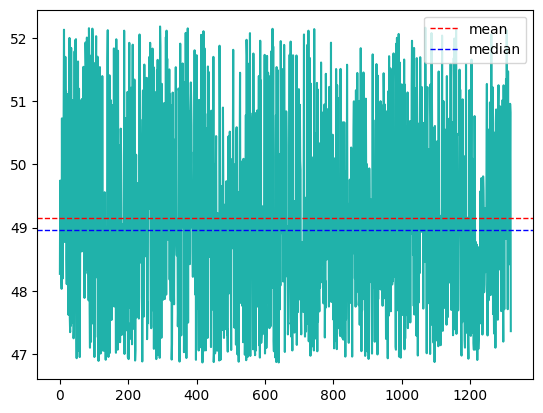

In [46]:
sampler.get_chain(discard=burn, thin=thin, flat=True).shape


plt.plot(emcee_thinned[:,0], color = "lightseagreen")

mean_t0 = np.mean(emcee_thinned[:,0])
print(mean_t0)
median_t0 = np.median(emcee_thinned[:,0])

plt.axhline(mean_t0, color='r', linestyle='dashed', linewidth=1, label = "mean")
plt.axhline(median_t0, color='b', linestyle='dashed', linewidth=1, label = "median")
plt.legend()

### CORNER PLOT

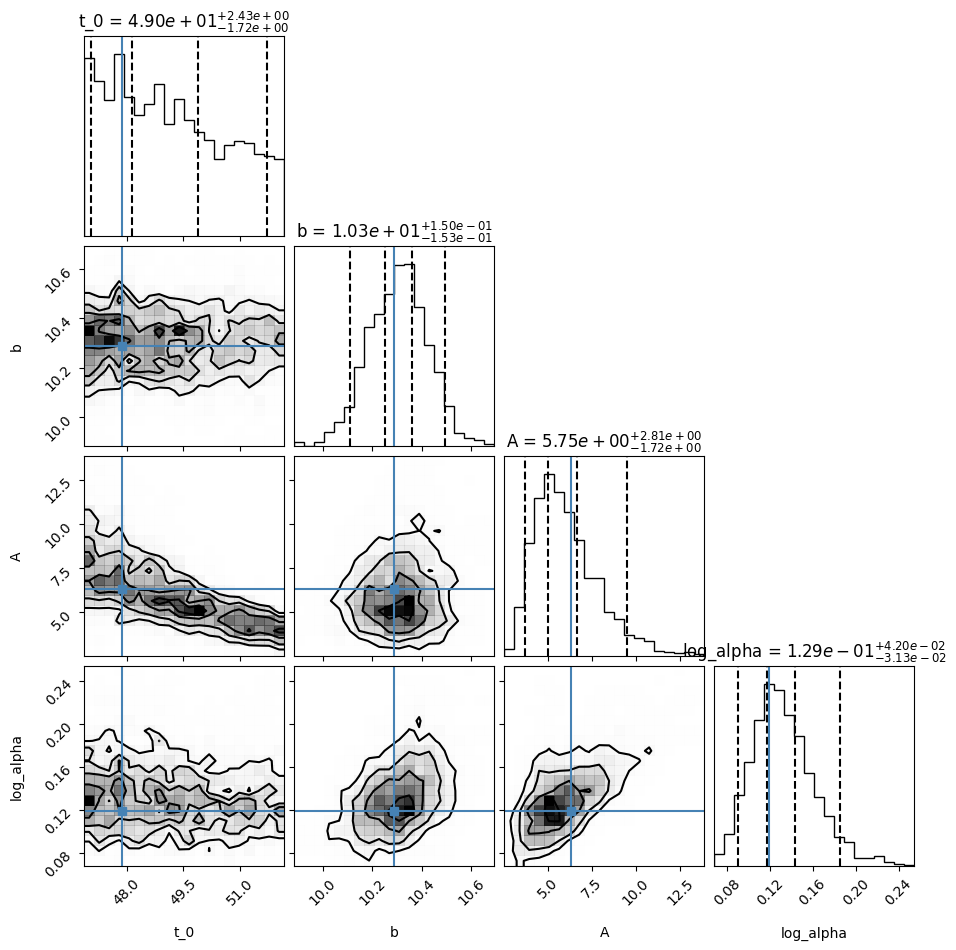

In [40]:
#I don't have the true values, I can plot the values i got from max likelihood estimation
fig = corner.corner(emcee_thinned, labels=labels, truths=par, 
                    quantiles= (0.025, 0.16, 0.84,0.9725), 
                    color = "black", title_quantiles=(0.10, 0.5, 0.90), 
                    show_titles=True, title_fmt='.2e', title_kwargs={"fontsize": 12},
                    plot_contours=True, plot_density=True, plot_datapoints=False, smooth=0.5);

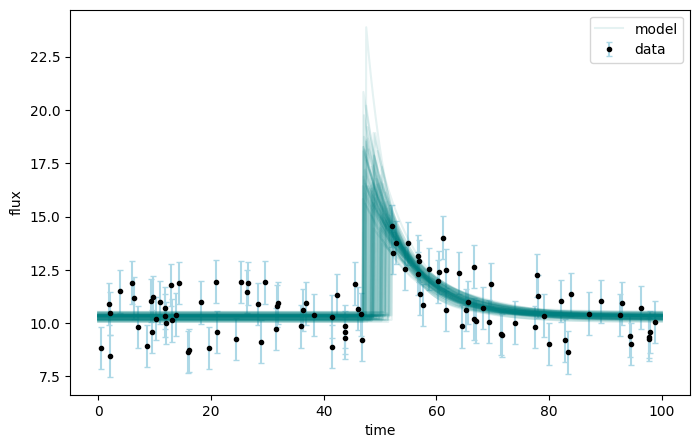

In [52]:
# now I need to choose 100 random samples from the burned, thinned chain
random_samples = np.random.choice(emcee_thinned.shape[0], size=100, replace=False)
selected_samples = emcee_thinned[random_samples]

fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='lightblue', markersize=3, capsize=2, capthick=1, label='data')

yfit = model_(xgrid, selected_samples[0])
ax.plot(xgrid, yfit, color='teal', alpha=0.1, label='model')

for sample in selected_samples:
    yfit = model_(xgrid, sample)
    ax.plot(xgrid, yfit, color='teal', alpha=0.1)

ax.set_xlabel('time')
ax.set_ylabel('flux')
ax.legend(loc='best', fontsize=10)
plt.show()

In [55]:
median_t0 = np.median(emcee_thinned[:, 0])
lower_t0 = np.percentile(emcee_thinned[:, 0], 5)
upper_t0 = np.percentile(emcee_thinned[:, 0], 95)
print(f"t_0 = {median_t0:.2f} +{upper_t0 - median_t0:.2f} -{median_t0 - lower_t0:.2f}")

median_b = np.median(emcee_thinned[:, 1])
lower_b = np.percentile(emcee_thinned[:, 1], 5)
upper_b = np.percentile(emcee_thinned[:, 1], 95)
print(f"b = {median_b:.2f} +{upper_b - median_b:.2f} -{median_b - lower_b:.2f}")

median_A = np.median(emcee_thinned[:, 2])
lower_A = np.percentile(emcee_thinned[:, 2], 5)
upper_A = np.percentile(emcee_thinned[:, 2], 95)
print(f"A = {median_A:.2f} +{upper_A - median_A:.2f} -{median_A - lower_A:.2f}")

median_log_alpha = np.median(emcee_thinned[:, 3])
lower_log_alpha = np.percentile(emcee_thinned[:, 3], 5)
upper_log_alpha = np.percentile(emcee_thinned[:, 3], 95)
print(f"log_alpha = {median_log_alpha:.2f} +{upper_log_alpha - median_log_alpha:.2f} -{median_log_alpha - lower_log_alpha:.2f}")



t_0 = 48.97 +2.76 -1.91
b = 10.31 +0.19 -0.19
A = 5.75 +3.72 -2.00
log_alpha = 0.13 +0.06 -0.04


# maybe I want to add Gibbs????

I cannot ( or don't want to) see the model with these parameters over data
### using medians of marginals---> wrong !! 
IN MY POSTERIORS I HAVE DIFFERENT MODELS (ONE FOR EACH LINE (?))
TAKING THE MEDIAN OF EACH MARGINALS GIVES ME A COMBINATION OF PARAMETERS THAT I DON'T HAVE IN MY MODELS, these numbers don't live in the 4-parameter space
## to extract a summary statistic:
I SHOULD TAKE SOMETHING LIKE THE MAXIMUM A POSTERIORI

# EXERCISE LECTURE 12 ----> LET'S DO THE SAME BUT WITH NESTED SAMPLING

### Time to get your hands dirty.  The transient Universe


Let's go back to our previous example on the astrophysical transient.


8) Fit the same model from before with the same priors,  but this time use nested sampling.

$y = b$, for $t<t_0$

$y = b + A\exp[-\alpha(t-t_0)]$, for $t\geq t_0$

Be careful with how you transform your parameter space into a unit hypercube for the nested sampling priors (I used `ppf` from `scipy.stats.uniform`, but there are other ways to do it)

An appropriate check on whether you have done things correctly is that the posterior samples you get from the burst analysis here should give an equivalent corner plot to the MCMC you did earlier.

7) Another possible model that may explain the data is a Gaussian profile described by:

$y = b + A\exp[-(t-t_0)^2 / 2\sigma_W^2]$

Fit this model usign nested sampling and reasonable priors (this time is up to you to decide...)

9) Unlike MCMCs, nested sampling provides the Bayesian evidence. Compute the Bayesian evidence for this Gaussian model, and for the original burst model. Which model is the favored description of the data?


In [56]:
import dynesty


I have my likelihood, do i have to normalize it ?
then define the prior as dynesty wants

In [57]:
def model_ (t, par):
    modello = []
    for time in t:
        if (time < par[0]):
            modello.append(par[1])              
        else:
            modello.append(par[1] + par[2] * np.exp(- par[3] * (time-par[0])))
    
    return modello

In [58]:
def prior_transform(u):
    """Transforms samples `u` drawn from the unit cube to samples to those
    from our uniform prior within [-10., 10.) for each variable."""
    prior_0 = stats.uniform(30,70).ppf(u[0])
    prior_1 = stats.uniform(0,20).ppf(u[1])
    prior_2 = stats.uniform(0,20).ppf(u[2])
    prior_3 = stats.uniform(np.exp(-5),np.exp(2)).ppf(u[3]) ###STIMIAMO ALPHA NON LOG ALPHA
    
    #return (prior_0 *prior_1* prior_2* prior_3)
                                
    return prior_0, prior_1, prior_2, prior_3

def loglike_normalized(par, data = data, model=model_):

    """Gaussian log-likelihood of the model """
    x = data [:,0]
    y = data [:,1]
    sigma_y = data [:,2]

    y_fit = model(x, par)
       
    return sum ( (stats.norm.logpdf(*args) - np.log(np.sqrt(2*np.pi)*args[2]) for args in zip(y, y_fit, sigma_y)) )

In [59]:
# "Static" nested sampling.
ndim = 4  # number of parameters in the model
#logliken = loglike_normalized(par, data = data, model=model_)
#print(logliken)

sampler = dynesty.NestedSampler(loglike_normalized, prior_transform, ndim, nlive = 1000)
sampler.run_nested()
sresults = sampler.results

14300it [33:50,  7.04it/s, +1000 | bound: 70 | nc: 1 | ncall: 140770 | eff(%): 10.947 | loglstar:   -inf < -232.550 <    inf | logz: -246.757 +/-  0.123 | dlogz:  0.001 >  1.009]


In [74]:
sresults = sampler.results

# let's save the results into a file, so that i don't have to do the nested sampling again
with open("nested_sampling_results.txt", "w") as file:
    file.write(str(sresults))


In [87]:
''' VORREI APRIRE IL FILE E VEDERE I RISULTATI, MA NON RIESCO A FARE IL LOAD DEL FILE, MI DA ERRORE'''


'''
import ast

with open("nested_sampling_results.txt", "r") as file:
    results_str = file.read()
    sampler_results = ast.literal_eval(results_str)'''

'\nimport ast\n\nwith open("nested_sampling_results.txt", "r") as file:\n    results_str = file.read()\n    sampler_results = ast.literal_eval(results_str)'

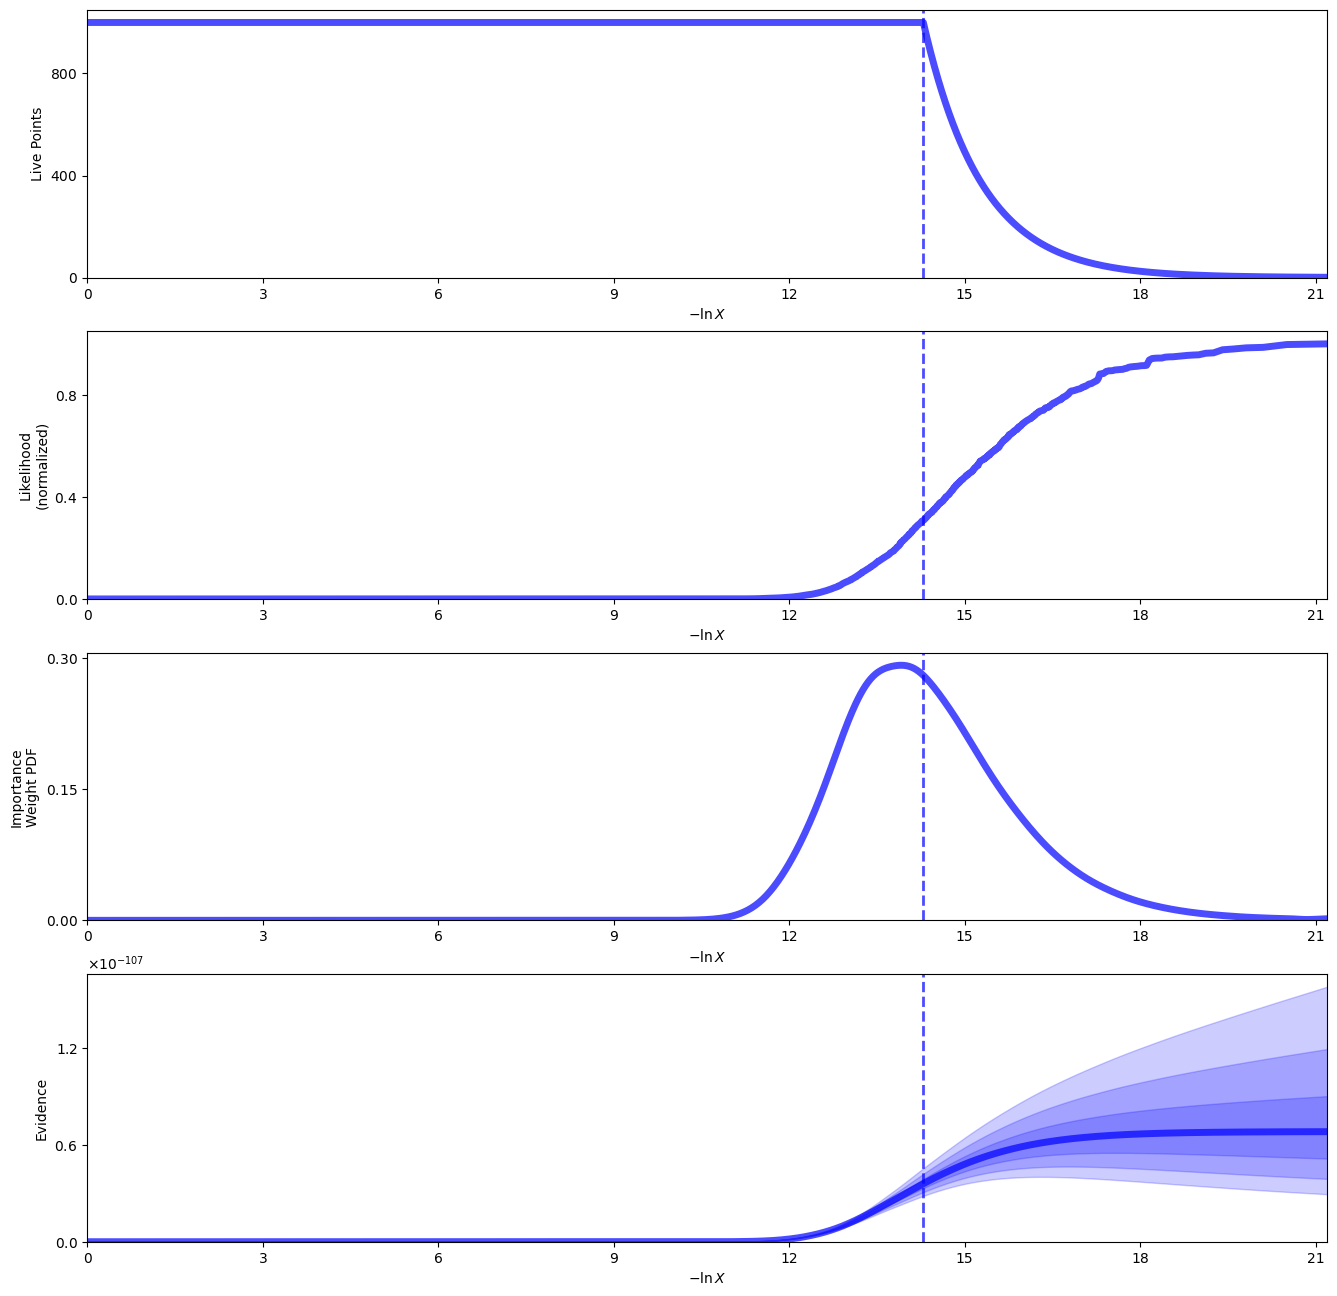

In [99]:
from dynesty import plotting as dyplot
plt.rcParams['figure.figsize'] = (8,8)
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(sresults)

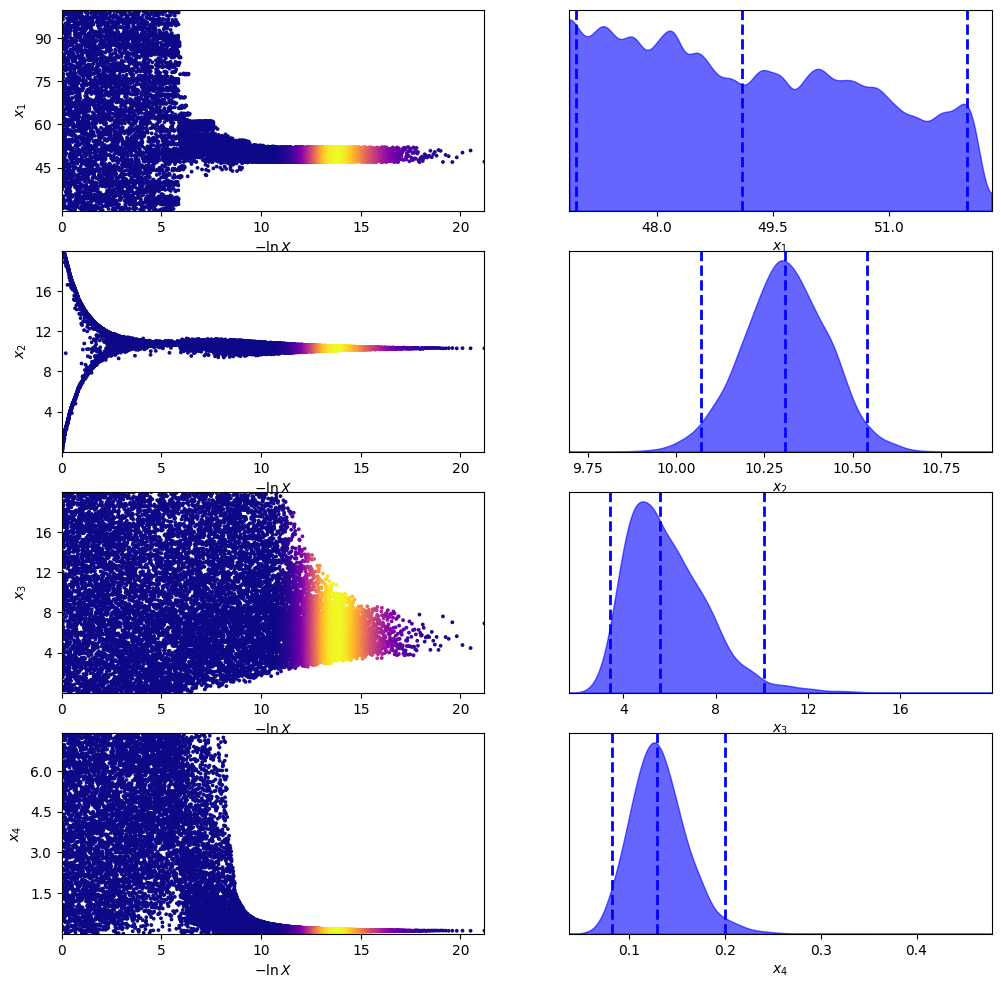

In [100]:
tfig, taxes = dyplot.traceplot(sresults)

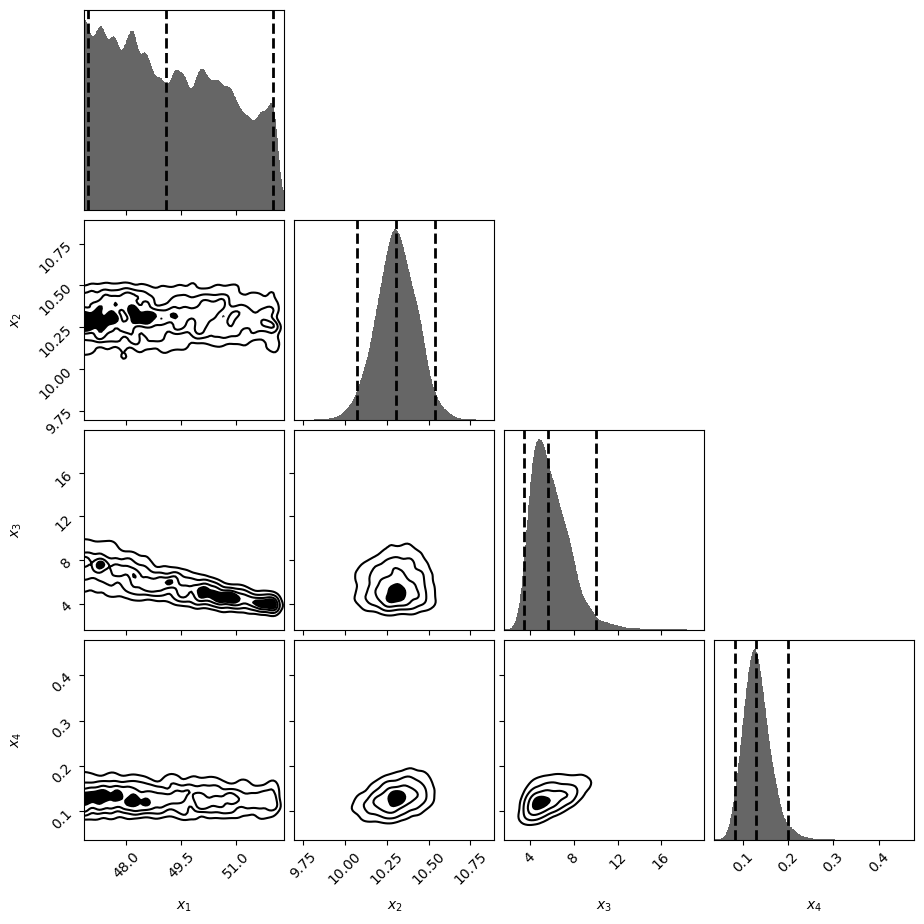

In [101]:
cfig, caxes = dyplot.cornerplot(sresults)

## Let's use a gaussian model instead


In [92]:
#par = [t0, b, A , sigma_W]
#$y = b + A\exp[-(t-t_0)^2 / 2\sigma_W^2]$


def model_2 (t, par):
    modello = []
    for time in t:
        modello.append(par[1] + par[2] * np.exp(- (time-par[0])**2 / (2*par[3]**2)))

    return modello


def prior_transform_2(u):
    """Transforms samples `u` drawn from the unit cube to samples to those
    from our uniform prior within [-10., 10.) for each variable."""
    prior_0 = stats.uniform(30,70).ppf(u[0])
    prior_1 = stats.uniform(0,20).ppf(u[1])
    prior_2 = stats.uniform(0,20).ppf(u[2])
    prior_3 = stats.uniform(np.exp(-2),np.exp(2)).ppf(u[3]) ###mi serve prior sigma_w... quale può essere?
    
    #return (prior_0 *prior_1* prior_2* prior_3)
                                
    return prior_0, prior_1, prior_2, prior_3

def loglike_normalized_2(par, data = data, model=model_2):

    """Gaussian log-likelihood of the model """
    x = data [:,0]
    y = data [:,1]
    sigma_y = data [:,2]

    y_fit = model(x, par)
       
    return sum ( (stats.norm.logpdf(*args) - np.log(np.sqrt(2*np.pi)*args[2]) for args in zip(y, y_fit, sigma_y)) )


In [93]:
# "Static" nested sampling.
ndim = 4  # number of parameters in the model
#logliken = loglike_normalized(par, data = data, model=model_)
#print(logliken)

sampler_2 = dynesty.NestedSampler(loglike_normalized_2, prior_transform_2, ndim, nlive = 300)
sampler_2.run_nested()
sresults_2 = sampler_2.results

1730it [04:40,  1.25it/s, bound: 18 | nc: 16 | ncall: 18351 | eff(%):  9.427 | loglstar:   -inf < -271.248 <    inf | logz: -278.754 +/-  0.147 | dlogz: 34.896 >  0.309] /home/malvi/venv/lib/python3.11/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
4047it [07:31,  8.97it/s, +300 | bound: 43 | nc: 1 | ncall: 29720 | eff(%): 14.776 | loglstar:   -inf < -236.194 <    inf | logz: -248.442 +/-  0.194 | dlogz:  0.001 >  0.309]


In [94]:
sresults_2 = sampler_2.results

# let's save the results into a file, so that i don't have to do the nested sampling again
with open("nested_sampling_results_2.txt", "w") as file:
    file.write(str(sresults_2))


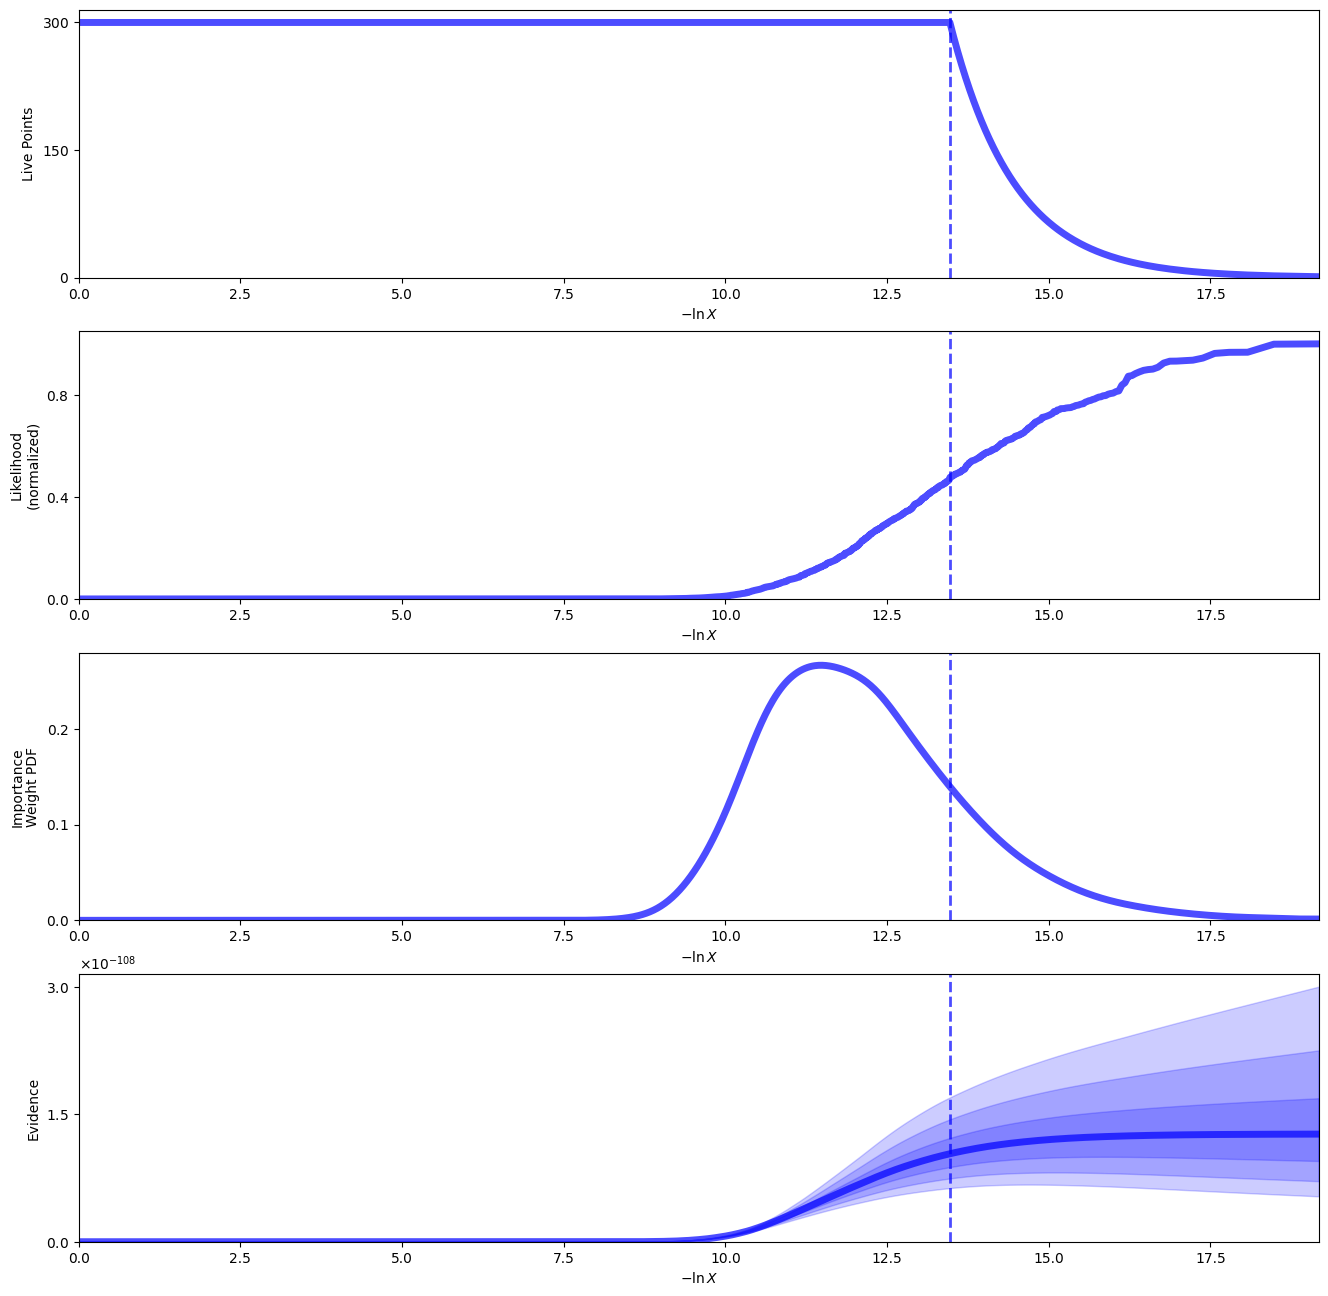

In [95]:
from dynesty import plotting as dyplot
plt.rcParams['figure.figsize'] = (8,8)
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(sresults_2)

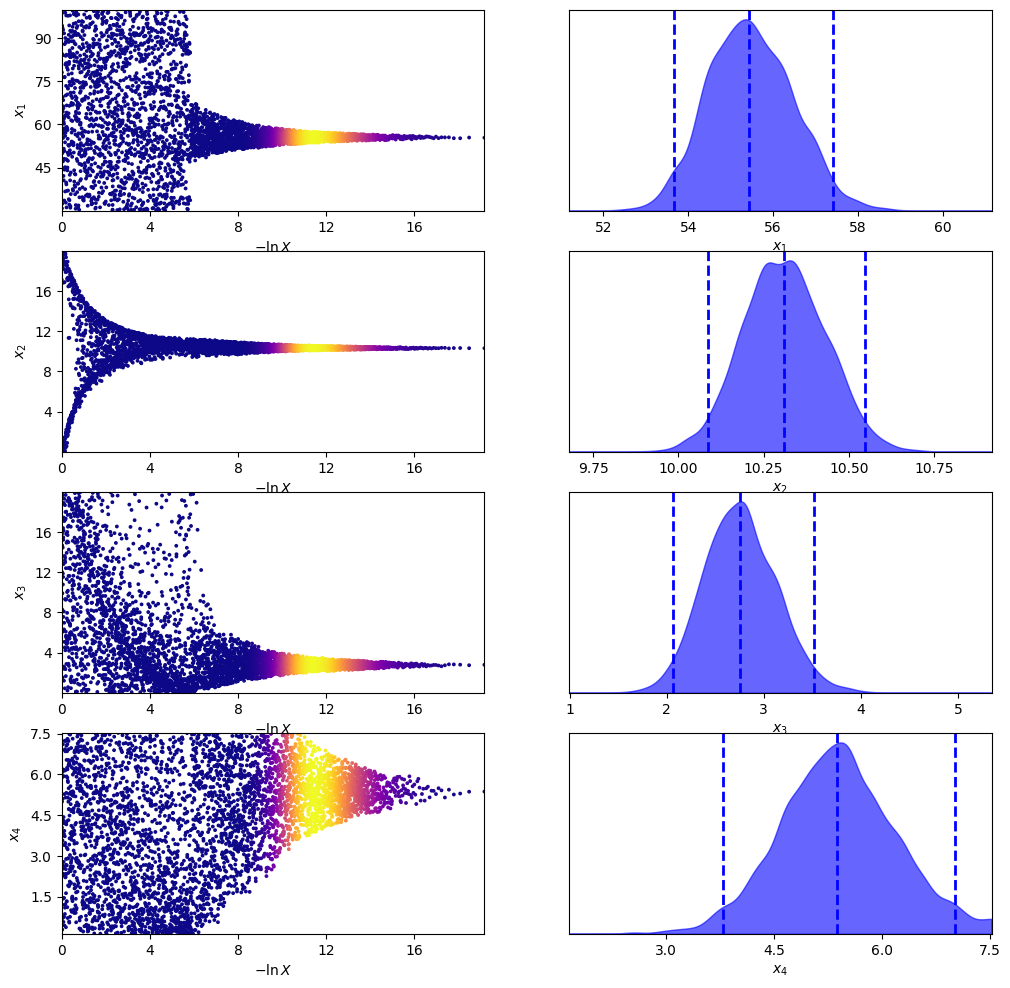

In [96]:
tfig, taxes = dyplot.traceplot(sresults_2)

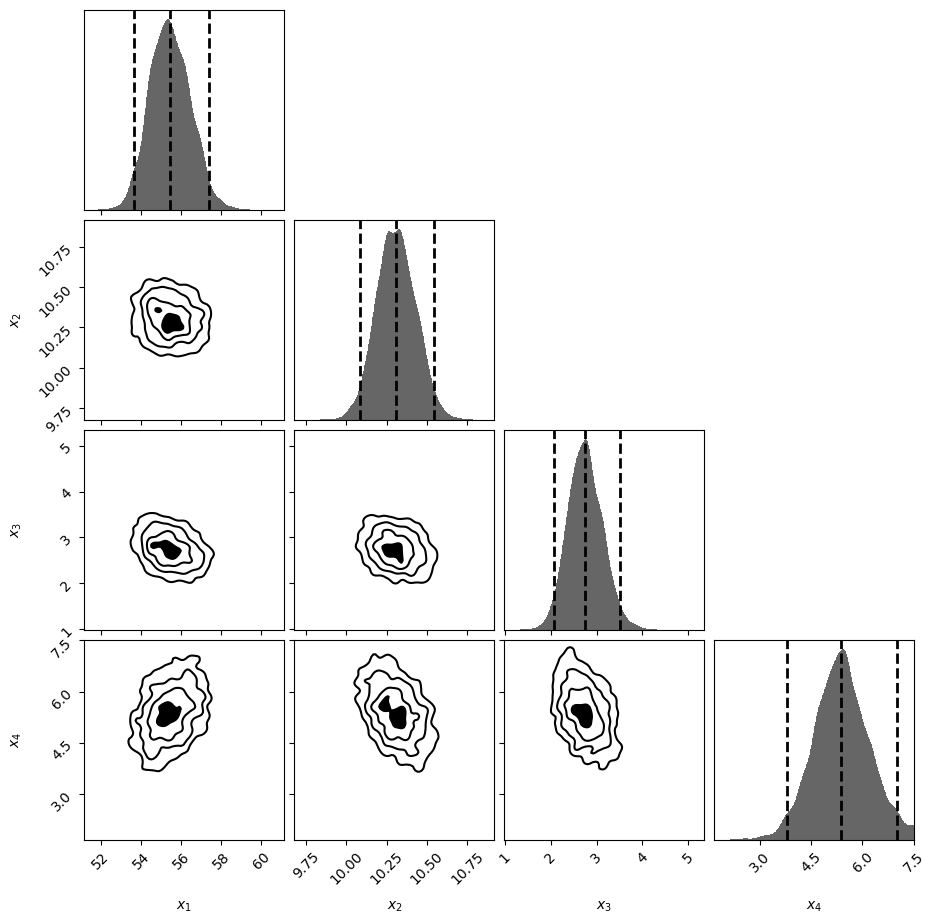

In [97]:
cfig, caxes = dyplot.cornerplot(sresults_2)

# Now I have to compute which model is best... BAYES FACTOR


### also assign an error to the estimate of the bayes factor!!

In [103]:
bayes_factor = np.exp(sresults.logz[-1])/np.exp(sresults_2.logz[-1])

print(bayes_factor)

# ERROR??   MAYBE BOOTSTRAP....


n_bootstrap = 1000

bootstrap_bayes_factor = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    # Resample the log evidence values from the two models
    resampled_log_evidence_1 = np.random.choice(sresults.logz, size=len(sresults.logz), replace=True)
    resampled_log_evidence_2 = np.random.choice(sresults_2.logz, size=len(sresults_2.logz), replace=True)
    
    bootstrap_bayes_factor[i] = np.exp(np.mean(resampled_log_evidence_1) - np.mean(resampled_log_evidence_2))

bootstrap_bayes_factor_mean = np.mean(bootstrap_bayes_factor)
bootstrap_bayes_factor_std = np.std(bootstrap_bayes_factor)

# Print the results
print("Bootstrap Bayes Factor: {:.3f} +/- {:.3f}".format(bootstrap_bayes_factor_mean, bootstrap_bayes_factor_std))

5.388542982477455
Bootstrap Bayes Factor: 19193321401518917872295525188894720.000 +/- 438090120894999520265318824734097408.000
